# Day1

# 課題　「100kmあたりのガソリン消費量 (consume)を予測」(Car Fuel Consumption)
[URL:]https://www.kaggle.com/anderas/car-consume
## 目次
###_[データの入手、データの前処理]_###  
__1.データ確認__
- 1-1説明変数と目的変数の意味  
- 1-2データ内容の確認  
- 1-3データを確認しての所見  

__2.欠測値の確認__  
- 2-1 欠測値を処理（"temp_inside"）    
- 2-2 欠損値の対応まとめ  

__3.外れ値、名寄せの対応__  
- 3-1 各データの分布確認    
- 3-2 名寄せ・外れ値の対応まとめ  
    
__4.目的変数と説明変数の関係__  
- 4-1 グラフ・表化  
- 4-2 関係性のまとめ  
    
###_[手法の選択、ハイパーパラメータの選択、モデルの学習]_###  
__5.各アルゴリズムの精度検証（CV済みモデルにて）__  
- 5-1線形回帰(LinearRegression)  
(- 5-2ロジスティック回帰(LogisticRegression))  
(- 5-3決定木(DecisionTreeClassifier))  
(- 5-4バギング(BaggingClassifier))  
(- 5-5ランダムフォレスト(RandomForestClassifier))  
(- 5-6アダブースト(AdaBoostClassifier))  
(- 5-7K近傍法(KNeighborsClassifier))  
(- 5-8SVM(SVC))  

###_[モデルの評価]_###  
(__6.各モデルの比較__)  
(- 6-1モデル比較)  
(- 6-2所見)  

###_[精度は十分か]_###  
(__7.精度向上検討__)  
(- 7-1検討事項)
(- 7-2検討結果)  

__8.まとめ__  
- 8-1まとめ
- 8-2終わりに

# 1.データ確認

## 1-1説明変数と目的変数の意味

[URL:]https://www.kaggle.com/anderas/car-consume  
# Columns

'distance' = 走行距離  
'consume' = 100kmあたりのガソリン消費量  
'speed' = 速度  
'temp_inside' = 室内温度  
'temp_outside' = 室外温度  
'specials' = 特殊状況  #anything special that happened  
'gas_type' = 燃料種別  
'AC' = エアコン  
'rain' = 雨  
'sun' = 晴れ  
'refill liters' = 燃料補給量  
'refill gas' = 補給燃料種別  
  
__【目的変数】'consume' = 消費量__  
__【説明変数対象】'consume'以外の項目__

In [1]:
#ライブラリ読み込み
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
#データ読み込み
df_data = pd.read_csv("../Downloads/car-consume/measurements.csv")
print(df_data.columns)
display(df_data.head())
display(df_data.tail())
print(df_data.shape)

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN
387,"14,7",5,25,25,30,AC,SP98,1,0,0,NaN,NaN


(388, 12)


## 1-2データ内容の確認

In [3]:
#各データの種類
for column in df_data.columns.values:
    if column in []:
        continue
    print(column, ":", len(set(df_data[column])), "件")
    print(set(df_data[column]))
    print()

distance : 174 件
{'31,9', '16,2', '21,4', '31,1', '12', '11,8', '16,1', '5,5', '18,8', '32,6', '28,2', '28,8', '41,9', '22,1', '13,3', '7,9', '21,5', '32', '13,1', '25,2', '18,1', '24,9', '13,4', '25,3', '4,1', '14,7', '12,6', '153,5', '4,8', '19,8', '6,7', '11,6', '16,7', '12,9', '29,9', '8,3', '23,5', '4,2', '93,9', '7,8', '13,2', '19', '20,8', '162,7', '35,8', '6', '24,5', '17', '13,9', '5,1', '51,6', '67,2', '12,7', '12,8', '44,9', '26,6', '16,3', '14', '2,1', '4,9', '11,7', '36,9', '56,1', '48,6', '18,3', '17,9', '13,6', '6,4', '18,4', '32,1', '10,1', '25,9', '12,5', '39,4', '10,5', '211', '20', '25,7', '16,8', '14,1', '29', '28', '12,3', '44,4', '28,5', '22,7', '22,9', '24,7', '14,5', '14,3', '20,9', '129,7', '9,8', '9,2', '11,5', '1,7', '16,5', '11,2', '100,9', '2,4', '216,1', '33,4', '10,2', '12,1', '24,8', '19,6', '37,2', '58,7', '25,5', '27,3', '5,2', '43,7', '36,5', '12,4', '22,2', '15,3', '38,5', '13', '15,9', '38,6', '22,4', '16,4', '2,9', '36,6', '2', '34,8', '16,6', '18,

In [4]:
# 各データの属性の確認
print(df_data.dtypes)

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object


In [5]:
#distanceをobject型からfloat64型へ変換
df_data["distance2"] = df_data["distance"].map({
'17,4':17.4, '18,5':18.5, '29':29.0, '11,3':11.3, '16,8':16.8, 
'24,8':24.8, '39':39.0, '25,3':25.3, '38,6':38.6, '28,2':28.2,
'12,4':12.4, '43,5':43.5, '6,7':6.7, '7,9':7.9, '21,1':21.1,
'16,4':16.4, '22,2':22.2, '14,5':14.5, '36,5':36.5, '31,1':31.1,
'5,5':5.5, '12,2':12.2, '41,9':41.9, '6,8':6.8, '28,5':28.5,
'16,5':16.5, '9,7':9.7, '22,7':22.7, '44,4':44.4, '16,1':16.1,
'1,7':1.7, '5,4':5.4, '19,6':19.6, '4,8':4.8, '26,2':26.2,
'11,7':11.7, '14,1':14.1, '153,5':153.5, '2,1':2.1, '5,3':5.3,
'31,5':31.5, '7,8':7.8, '31,4':31.4, '25,9':25.9, '7,4':7.4,
'31,8':31.8, '13,1':13.1, '20,8':20.8, '6,4':6.4, '21,5':21.5,
'216,1':216.1, '22,9':22.9, '24,5':24.5, '32,6':32.6, '12,7':12.7,
'17,3':17.3, '25,7':25.7, '17,2':17.2, '1,3':1.3, '14':14.0, '4,1':4.1,
'44,9':44.9, '13,2':13.2, '43,7':43.7, '32,1':32.1, '11,8':11.8,
'12':12.0, '16,3':16.3, '93,9':93.9, '10,2':10.2, '20,6':20.6, '11,6':11.6,
'17':17.0, '101,9':101.9, '53,2':53.2, '100,9':100.9, '6':6.0, '25,2':25.2,
'37,2':37.2, '20,9':20.9, '16,7':16.7, '19,8':19.8, '11,2':11.2, '58,7':58.7,
'32':32.0, '9,9':9.9, '14,2':14.2, '12,8':12.8, '24,9':24.9, '28,8':28.8,
'18,7':18.7, '23,5':23.5, '19':19.0, '28':28.0, '10,6':10.6, '39,4':39.4,
'9,2':9.2, '15,4':15.4, '12,3':12.3, '29,9':29.9, '15,3':15.3, '16,9':16.9,
'21':21.0, '67,2':67.2, '11,9':11.9, '34,8':34.8, '35,9':35.9, '31,9':31.9,
'27,3':27.3, '35,8':35.8, '10,1':10.1, '48,6':48.6, '21,6':21.6, '21,4':21.4,
'33,4':33.4, '8,3':8.3, '2,9':2.9, '5,1':5.1, '8,7':8.7, '20':20.0, '15,7':15.7,
'18,3':18.3, '18,9':18.9, '6,6':6.6, '6,1':6.1, '13,3':13.3, '81,2':81.2,
'13':13.0, '39,5':39.5, '51,6':51.6, '129,7':129.7, '22,1':22.1, '27,1':27.1,
'211':211.0, '40,6':40.6, '18,1':18.1, '12,1':12.1, '18,4':18.4, '4,5':4.5,
'16,2':16.2, '56,1':56.1, '13,4':13.4, '18,8':18.8, '4,9':4.9, '36,6':36.6,
'16':16.0, '2':2.0, '10,8':10.8, '20,1':20.1, '36,9':36.9, '7':7.0, '130,3':130.3,
'162,7':162.7, '10,5':10.5, '26,6':26.6, '14,3':14.3, '22,4':22.4, '38,5':38.5,
'15,9':15.9, '24,7':24.7, '12,5':12.5, '5,2':5.2, '4,2':4.2, '12,6':12.6,
'11,5':11.5, '12,9':12.9, '13,6':13.6, '17,9':17.9, '9,8':9.8, '14,7':14.7,
'16,6':16.6, '2,4':2.4, '25,5':25.5, '13,9':13.9
})

In [6]:
#consumeをobject型からfloat64型へ変換
df_data["consume2"] = df_data["consume"].map({
'3,9':3.9, '3,7':3.7, '3,6':3.6, '5,6':5.6, '4,5':4.5, '7,9':7.9, '4,7':4.7, 
'4,1':4.1, '4,9':4.9, '7,1':7.1, '10,8':10.8, '6,2':6.2, '5,7':5.7, '5,5':5.5,
'6,3':6.3, '3,3':3.3, '4,3':4.3, '6,5':6.5, '12,2':12.2, '3,8':3.8, '8,1':8.1,
'5,8':5.8, '5,4':5.4, '4,8':4.8, '5,2':5.2, '5':5.0, '4':4.0, '5,1':5.1, '5,3':5.3,
'6,9':6.9, '4,4':4.4, '4,2':4.2, '8,7':8.7, '6':6.0, '11,5':11.5, '5,9':5.9,
'7,4':7.4, '4,6':4.6, '6,6':6.6, '6,1':6.1, '9,9':9.9, '9':9.0, '6,4':6.4   
    })

In [7]:
#speedをint型からfloat64型へ変換
df_data["speed2"] = df_data["speed"].values.astype("float64")

In [8]:
#temp_insideをobject型からfloat64型へ変換
df_data["temp_inside2"] = df_data["temp_inside"].map({
'20':20.0, '20,5':20.5, '23':23.0, '21':21.0, '21,5':21.5, '22,5':22.5, 
'23,5':23.5, '22':22.0, '19':19.0, '24,5':24.5, '25,5':25.5, '24':24.0, '25':25.0
        })

In [9]:
#temp_outsideをint型からfloat64型へ変換
df_data["temp_outside2"] = df_data["temp_outside"].values.astype("float64")

In [10]:
#gas_typeをobject型からfloat64型へ変換
#df_data["gas_type2"] = df_data["gas_type"].map({
#'E10':0.0, 'SP98':1.0
#        })

In [11]:
#ACをint型からfloat64型へ変換
df_data["AC2"] = df_data["AC"].values.astype("float64")

In [12]:
#rainをint型からfloat64型へ変換
df_data["rain2"] = df_data["rain"].values.astype("float64")

In [13]:
#sunをint型からfloat64型へ変換
df_data["sun2"] = df_data["sun"].values.astype("float64")

In [14]:
# 各データの属性の確認
print(df_data.dtypes)

distance          object
consume           object
speed              int64
temp_inside       object
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters     object
refill gas        object
distance2        float64
consume2         float64
speed2           float64
temp_inside2     float64
temp_outside2    float64
AC2              float64
rain2            float64
sun2             float64
dtype: object


In [15]:
# 使わないデータを削除
#.drop("gas_type", axis=1)を落として、"gas_type2"float64型へ変換パターン
#df_data_c = df_data.drop("distance", axis=1).drop("consume", axis=1).drop("speed", axis=1).drop("temp_inside", axis=1)\
#.drop("temp_outside", axis=1).drop("specials", axis=1).drop("gas_type", axis=1).drop("AC", axis=1)\
#.drop("rain", axis=1).drop("sun", axis=1).drop("refill liters", axis=1).drop("refill gas", axis=1)

#.drop("gas_type", axis=1)はダミー変数にするので、残すパターン
df_data_c = df_data.drop("distance", axis=1).drop("consume", axis=1).drop("speed", axis=1).drop("temp_inside", axis=1)\
.drop("temp_outside", axis=1).drop("specials", axis=1).drop("AC", axis=1)\
.drop("rain", axis=1).drop("sun", axis=1).drop("refill liters", axis=1).drop("refill gas", axis=1)

In [16]:
# 各データの属性の確認
print(df_data_c.dtypes)

gas_type          object
distance2        float64
consume2         float64
speed2           float64
temp_inside2     float64
temp_outside2    float64
AC2              float64
rain2            float64
sun2             float64
dtype: object


In [17]:
# ダミー変数の生成
df_data_c = pd.get_dummies(df_data_c)

In [18]:
# 各データの属性の確認
print(df_data_c.dtypes)

distance2        float64
consume2         float64
speed2           float64
temp_inside2     float64
temp_outside2    float64
AC2              float64
rain2            float64
sun2             float64
gas_type_E10       uint8
gas_type_SP98      uint8
dtype: object


### 1-3データを確認しての所見  

→@データの属性にobject型がやや紛れているので、全てfloat64型に変換してみた。多分"."を","で入力していたためobject型になったと思われる。  
→@↑上記の処理について、もっと簡単に出来るのではないかとは思う。  
→@'specials'については別途'AC','rain','sun'にてダミー変数表記してあるので、もしかしたら不要。'snow','half rain half sun'の扱いをどうするか。  
　→@'snow','half rain half sun'は'rain'として表記している。ダミー変数表記が全て0の値の場合、'specials'は値なし。  
→@'refill liters'及び'refill gas'については燃料補給の時だけしか出現しないので、出現回数が少ない。 
→@'refill liters'及び'refill gas'については単発ではあまり意味のないデータ？時系列があって補給後に車体重量が変わるなどあれば利用可能か？  
→@'temp_inside'と'temp_outside'については差分を取って見るのも面白いかもしれない。  
→@'temp_inside'と'temp_outside'の差分と'AC'の関係性も気になる。差が大きい方が'AC'の利用度が高いのか？むしろ差が小さい方が'AC'が働いているのか？  
→@全体を通してcolumnが少ない。車体重量や地形の特性（起伏やカーブ等の状況、路面状況）、停車発車回数、ブレーキ数、   
    運転者、積載量、乗車人数などの諸元があっても良い。 
→@"gas_type"をダミー変数へ"gas_type_E10"と"gas_type_SP98"  

→@@@目的変数_(consume)  
→@@@説明変数_8(distance,speed,temp_inside,temp_outside,gas_type_E10,gas_type_SP98,AC,rain,sun)  
→@@@除外項目_3(specials,refill liters,refill gas)  

# 2.欠測値の確認

In [19]:
# 欠測値の数
pd.DataFrame(df_data_c.isnull().sum(), columns=["num of missing"])

,num of missing
distance2,0
consume2,0
speed2,0
temp_inside2,12
temp_outside2,0
AC2,0
rain2,0
sun2,0
gas_type_E10,0
gas_type_SP98,0


In [20]:
# 各カラム毎に欠損値の数の合計を計算する
df_missing = pd.DataFrame(df_data_c.isnull().sum(), columns=["欠損データ数"])

# 全データに締める欠損データの数を割合で確認するためのデータを準備する
total_count = df_data_c.shape[0] # 全データ数を取得する
df_missing_rate = df_missing[(df_missing["欠損データ数"] > 0)] /total_count*100 # 欠損値の数を全データ数で割ることで割合を求める
df_missing_rate = df_missing_rate.rename(columns={'欠損データ数': '欠損データの割合(%)'})

print("欠損データの割合を表示。（※ 全体のデータ件数は、", total_count, "件）")
pd.concat([df_missing[(df_missing["欠損データ数"] > 0)], df_missing_rate], axis=1)

欠損データの割合を表示。（※ 全体のデータ件数は、 388 件）


,欠損データ数,欠損データの割合(%)
temp_inside2,12,3.092784


## 2-1 欠測値を処理（"temp_inside"）

In [21]:
df_data_c[df_data_c["temp_inside2"].isnull()]

,distance2,consume2,speed2,temp_inside2,temp_outside2,AC2,rain2,sun2,gas_type_E10,gas_type_SP98
93,12.4,4.7,43.0,NaN,10.0,0.0,0.0,0.0,0,1
95,11.8,5.3,52.0,NaN,11.0,0.0,0.0,0.0,0,1
97,15.7,5.3,33.0,NaN,9.0,0.0,0.0,0.0,0,1
98,12.9,5.7,35.0,NaN,9.0,0.0,0.0,0.0,0,1
99,6.4,4.4,37.0,NaN,10.0,0.0,0.0,0.0,0,1
100,5.3,4.1,34.0,NaN,9.0,0.0,0.0,0.0,0,1
102,18.8,5.0,62.0,NaN,9.0,0.0,1.0,0.0,0,1
201,22.2,3.8,42.0,NaN,15.0,0.0,0.0,0.0,0,1
203,12.6,4.1,33.0,NaN,17.0,0.0,0.0,0.0,0,1
261,24.5,3.9,50.0,NaN,15.0,0.0,0.0,1.0,1,0


In [22]:
#欠測値の処理（temp_inside）　#23.0(適当に中間値辺りを入れてみた。)に変換。temp_outsideを参考に該当するemp_outsideの気温の時のtemp_insideの平均を代入するのもあり。
df_data_c = df_data_c.fillna({"temp_inside2":23.0})

In [23]:
# 欠測値の数
pd.DataFrame(df_data_c.isnull().sum(), columns=["num of missing"])

,num of missing
distance2,0
consume2,0
speed2,0
temp_inside2,0
temp_outside2,0
AC2,0
rain2,0
sun2,0
gas_type_E10,0
gas_type_SP98,0


## 2-2 欠損値の対応まとめ

→@"temp_inside"だけ12個欠測していたが、適当に全体(↓下記)の中央値付近の値(23.0)を代入して対応した。  
{'21,5', '24', '21', '24,5', '20,5', '20', '22,5', '23', '19', '25', '22', '23,5', '25,5'}  
→@"temp_outside"を参考に該当するemp_outsideの気温の時の"temp_inside"の平均を代入するのもあり。  

# 3.外れ値、名寄せの対応

## 3-1各データの分布確認

"consume2"データの分布の確認


/Users/ri003067/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


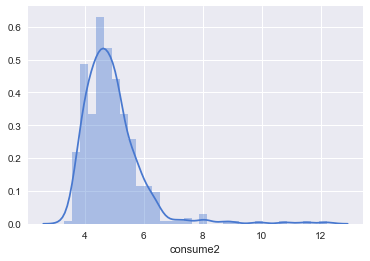

In [24]:
#データの分布の確認
print('"consume2"データの分布の確認')
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))
sns.distplot(df_data_c["consume2"]);

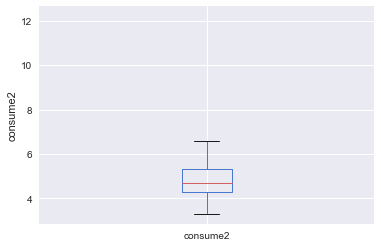

In [25]:
#箱ひげ図
#区間D：ひげの上端（最大値）から箱の上端（第三四分位）まで
#区間C：箱の上端（第三四分位）から箱の中央の線（中央値）まで
#区間B：箱の中央の線（中央値）から箱の下端（第一四分位）まで
#区間A：箱の下端（第一四分位）からひげの下端（最小値）まで
#A、B、C、Dの4区間のなかに、それぞれ同じ個数だけデータが入っています。
#しかし、同じ個数でもその区間の長さが異なることから、データのばらつき具合を知ることができます。
#また、箱の高さ（区間Bと区間Cを合わせたもの）は全データの半分のデータを表す。


df_data_c.boxplot(column="consume2")
plt.title("")
plt.ylabel("consume2")
plt.show()

In [26]:
#"consume2"と"distance2"との関係
#現状確認
print("現状確認")
df_c = pd.crosstab(index=df_data_c["consume2"], columns=df_data_c["distance2"], margins=True)
display(df_c)  

# 外れ値を削除
#df_data = df_data[(0<df_data[""distance2"])&(df_data["distance2"]<100)]

# 外れ値を削除
#走行距離が極端に長い短いで外れ値とするのも変なので、特になしと考える。

現状確認


distance2,1.3,1.7,2.0,2.1,2.4,2.9,4.1,4.2,4.5,4.8,...,93.9,100.9,101.9,129.7,130.3,153.5,162.7,211.0,216.1,All
consume2,,,,,,,,,,,,,,,,,,,,,
3.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
3.9,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,14
4.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
4.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20
4.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20


"distance2"データの分布の確認


/Users/ri003067/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


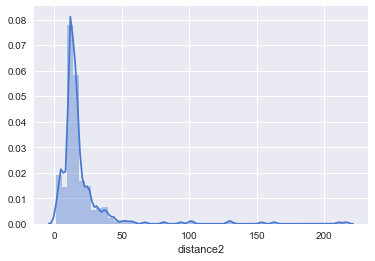

In [27]:
#データの分布の確認
print('"distance2"データの分布の確認')
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))
sns.distplot(df_data_c["distance2"]);

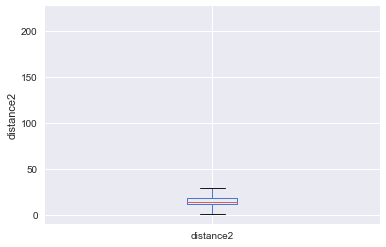

In [28]:
#箱ひげ図
df_data_c.boxplot(column="distance2")
plt.title("")
plt.ylabel("distance2")
plt.show()

In [29]:
#"consume2"と"speed2"との関係
#現状確認
print("現状確認")
df_c = pd.crosstab(index=df_data_c["consume2"], columns=df_data_c["speed2"], margins=True)
display(df_c)  

# 外れ値を削除
#マイナスの値もないので、特になしと考える。

現状確認


speed2,14.0,16.0,18.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,...,71.0,73.0,75.0,80.0,82.0,85.0,87.0,88.0,90.0,All
consume2,,,,,,,,,,,,,,,,,,,,,
3.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
3.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
4.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
4.1,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,20
4.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20


"speed2"データの分布の確認


/Users/ri003067/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


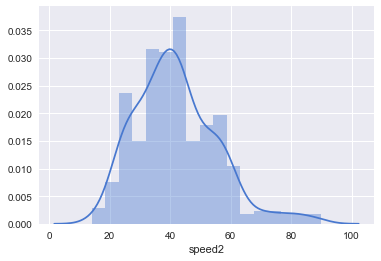

In [30]:
#データの分布の確認
print('"speed2"データの分布の確認')
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))
sns.distplot(df_data_c["speed2"]);

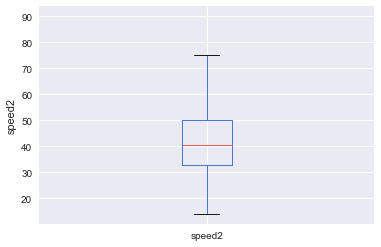

In [31]:
#箱ひげ図
df_data_c.boxplot(column="speed2")
plt.title("")
plt.ylabel("speed2")
plt.show()

In [32]:
#"consume2"と"temp_inside2"との関係
#現状確認
print("現状確認")
df_c = pd.crosstab(index=df_data_c["consume2"], columns=df_data_c["temp_inside2"], margins=True)
display(df_c)  

# 外れ値を削除
#大きなマイナスの値もなく50度以上等もないので、特になしと考える。

現状確認


temp_inside2,19.0,20.0,20.5,21.0,21.5,22.0,22.5,23.0,23.5,24.0,24.5,25.0,25.5,All
consume2,,,,,,,,,,,,,,
3.3,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3.6,0,2,0,0,0,2,0,0,0,0,0,0,0,4
3.7,0,1,0,0,0,3,0,0,0,0,3,1,0,8
3.8,0,0,0,0,1,6,0,2,0,0,1,1,0,11
3.9,0,0,0,0,2,9,1,2,0,0,0,0,0,14
4.0,0,2,0,0,2,9,2,1,0,0,0,1,0,17
4.1,0,0,0,0,2,13,2,2,0,0,0,0,1,20
4.2,0,1,0,0,5,8,0,0,0,0,0,1,0,15
4.3,0,2,0,0,7,7,1,0,0,1,0,2,0,20


"temp_inside2"データの分布の確認


/Users/ri003067/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


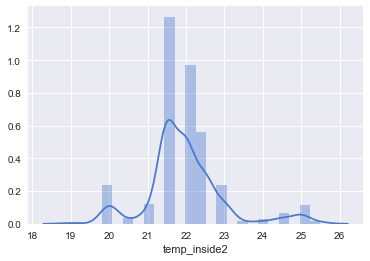

In [33]:
#データの分布の確認
print('"temp_inside2"データの分布の確認')
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))
sns.distplot(df_data_c["temp_inside2"]);

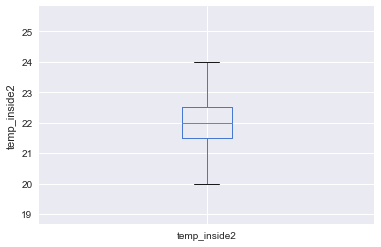

In [34]:
#箱ひげ図
df_data_c.boxplot(column="temp_inside2")
plt.title("")
plt.ylabel("temp_inside2")
plt.show()

In [35]:
#"consume2"と"temp_outside2"との関係
#現状確認
print("現状確認")
df_c = pd.crosstab(index=df_data_c["consume2"], columns=df_data_c["temp_outside2"], margins=True)
display(df_c)  

# 外れ値を削除
#大きなマイナスの値もなく50度以上等もないので、特になしと考える。

現状確認


temp_outside2,-5.0,-3.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,...,22.0,23.0,24.0,25.0,26.0,27.0,28.0,30.0,31.0,All
consume2,,,,,,,,,,,,,,,,,,,,,
3.3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4
3.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,8
3.8,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,11
3.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,14
4.0,0,0,0,0,0,0,1,0,0,1,...,0,2,0,0,0,0,0,0,0,17
4.1,0,0,0,0,0,0,0,0,0,0,...,0,0,2,1,1,0,0,1,0,20
4.2,0,0,0,0,0,0,1,0,0,1,...,1,0,1,1,0,0,0,0,0,15
4.3,0,1,0,0,1,0,0,0,1,3,...,1,2,0,0,0,0,0,0,1,20


"temp_outside2"データの分布の確認


/Users/ri003067/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


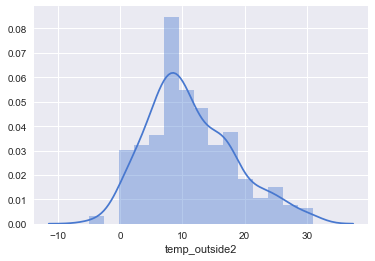

In [36]:
#データの分布の確認
print('"temp_outside2"データの分布の確認')
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))
sns.distplot(df_data_c["temp_outside2"]);

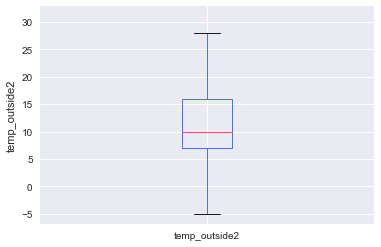

In [37]:
#箱ひげ図
df_data_c.boxplot(column="temp_outside2")
plt.title("")
plt.ylabel("temp_outside2")
plt.show()

In [38]:
#"consume2"と"AC2"との関係
#現状確認
print("現状確認")
df_c = pd.crosstab(index=df_data_c["consume2"], columns=df_data_c["AC2"], margins=True)
display(df_c)  

# 外れ値を削除
#特になしと考える。

現状確認


AC2,0.0,1.0,All
consume2,,,
3.3,1,0,1
3.6,4,0,4
3.7,8,0,8
3.8,11,0,11
3.9,14,0,14
4.0,14,3,17
4.1,19,1,20
4.2,14,1,15
4.3,19,1,20


In [39]:
#"consume2"と"rain2"との関係
#現状確認
print("現状確認")
df_c = pd.crosstab(index=df_data_c["consume2"], columns=df_data_c["rain2"], margins=True)
display(df_c)  

# 外れ値を削除
#特になしと考える。

現状確認


rain2,0.0,1.0,All
consume2,,,
3.3,1,0,1
3.6,4,0,4
3.7,8,0,8
3.8,11,0,11
3.9,14,0,14
4.0,16,1,17
4.1,20,0,20
4.2,13,2,15
4.3,18,2,20


In [40]:
#"consume2"と"sun2"との関係
#現状確認
print("現状確認")
df_c = pd.crosstab(index=df_data_c["consume2"], columns=df_data_c["sun2"], margins=True)
display(df_c)  

# 外れ値を削除
#特になしと考える。

現状確認


sun2,0.0,1.0,All
consume2,,,
3.3,1,0,1
3.6,3,1,4
3.7,6,2,8
3.8,10,1,11
3.9,9,5,14
4.0,15,2,17
4.1,15,5,20
4.2,14,1,15
4.3,19,1,20


In [41]:
#"consume2"と"gas_type_E10"との関係
#現状確認
print("現状確認")
df_c = pd.crosstab(index=df_data_c["consume2"], columns=df_data_c["gas_type_E10"], margins=True)
display(df_c)  

# 外れ値を削除
#特になしと考える。

現状確認


gas_type_E10,0,1,All
consume2,,,
3.3,1,0,1
3.6,4,0,4
3.7,6,2,8
3.8,5,6,11
3.9,8,6,14
4.0,11,6,17
4.1,16,4,20
4.2,9,6,15
4.3,13,7,20


In [42]:
#"consume2"と"gas_type_SP98"との関係
#現状確認
print("現状確認")
df_c = pd.crosstab(index=df_data_c["consume2"], columns=df_data_c["gas_type_SP98"], margins=True)
display(df_c)  

# 外れ値を削除
#特になしと考える。

現状確認


gas_type_SP98,0,1,All
consume2,,,
3.3,0,1,1
3.6,0,4,4
3.7,2,6,8
3.8,6,5,11
3.9,6,8,14
4.0,6,11,17
4.1,4,16,20
4.2,6,9,15
4.3,7,13,20


## 3-2 名寄せ・外れ値の対応まとめ 

→@全ての項目について、名寄せ・外れ値の対応は行わなかった。  
→@"sun"については何もなしとの違いが分からないので、そもそも項目ごと削除しても良いのではないかと思った。  

# 4.目的変数と説明変数の関係

## 4-1 グラフ・表化

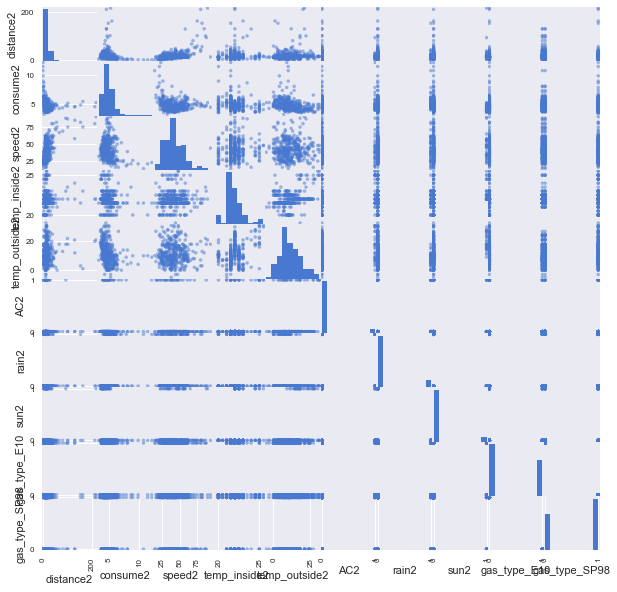

In [43]:
# 散布図行列を書いてみる
pd.plotting.scatter_matrix(df_data_c, figsize=(10,10))
plt.show()

In [44]:
# 相関係数を確認
df_data_c.corr()

,distance2,consume2,speed2,temp_inside2,temp_outside2,AC2,rain2,sun2,gas_type_E10,gas_type_SP98
distance2,1.000000,-0.128967,0.562299,0.067350,0.088175,-0.025738,-0.019791,0.081120,0.053411,-0.053411
consume2,-0.128967,1.000000,-0.227866,-0.170728,-0.320811,0.096591,0.248118,-0.170667,0.015327,-0.015327
speed2,0.562299,-0.227866,1.000000,0.056049,0.015411,-0.035408,0.009489,0.081618,0.097360,-0.097360
temp_inside2,0.067350,-0.170728,0.056049,1.000000,0.356023,0.282848,-0.040329,0.238242,-0.020831,0.020831
temp_outside2,0.088175,-0.320811,0.015411,0.356023,1.000000,0.167562,-0.186315,0.346903,-0.148705,0.148705
AC2,-0.025738,0.096591,-0.035408,0.282848,0.167562,1.000000,0.242915,0.088598,-0.105285,0.105285
rain2,-0.019791,0.248118,0.009489,-0.040329,-0.186315,0.242915,1.000000,-0.112650,-0.060328,0.060328
sun2,0.081120,-0.170667,0.081618,0.238242,0.346903,0.088598,-0.112650,1.000000,-0.022761,0.022761
gas_type_E10,0.053411,0.015327,0.097360,-0.020831,-0.148705,-0.105285,-0.060328,-0.022761,1.000000,-1.000000
gas_type_SP98,-0.053411,-0.015327,-0.097360,0.020831,0.148705,0.105285,0.060328,0.022761,-1.000000,1.000000


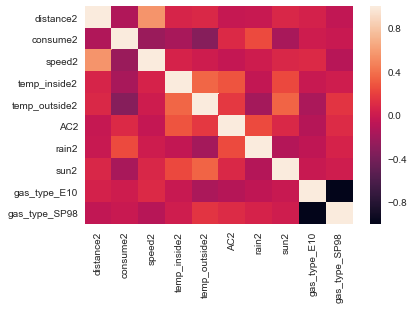

In [45]:
# 相関係数をヒートマップにして可視化
sns.heatmap(df_data_c.corr())
plt.show()

## 4-2 関係性のまとめ 

→@表の分析の仕方はよく分からないが、とりあえず可視化してみた。

# 5.各アルゴリズムの精度検証（CV済みモデルにて）

## 5-1線形回帰(LinearRegression)

In [46]:
print(df_data_c.shape)

(388, 10)


In [47]:
#各データの種類の確認

for column in df_data_c.columns.values:
    if column in ["Timestamp", "comments"]:
        continue
    print(column, ":", len(set(df_data_c[column])), "件")
    print(set(df_data_c[column]))
    print()

distance2 : 174 件
{1.7, 2.0, 2.9, 4.9, 4.5, 5.4, 7.8, 8.3, 6.1, 10.2, 11.2, 12.0, 12.9, 12.3, 11.9, 12.4, 11.8, 18.5, 17.3, 14.2, 17.9, 18.4, 18.3, 24.7, 25.9, 25.3, 19.0, 28.0, 20.0, 27.3, 31.1, 32.6, 33.4, 34.8, 35.9, 7.0, 36.9, 36.6, 39.4, 35.8, 40.6, 38.6, 43.5, 44.9, 44.4, 43.7, 39.0, 48.6, 41.9, 10.5, 51.6, 53.2, 56.1, 11.5, 58.7, 12.5, 13.0, 67.2, 14.0, 14.5, 16.0, 16.6, 16.1, 16.4, 81.2, 17.4, 16.9, 17.0, 16.5, 18.9, 18.1, 93.9, 19.6, 100.9, 20.1, 101.9, 20.6, 20.9, 21.6, 21.1, 2.4, 21.4, 21.5, 22.9, 22.4, 22.1, 21.0, 23.5, 24.9, 24.5, 25.5, 129.7, 130.3, 26.6, 5.5, 27.1, 28.5, 29.0, 29.9, 153.5, 31.4, 31.5, 31.9, 6.4, 6.0, 162.7, 32.1, 7.9, 7.4, 32.0, 9.9, 36.5, 37.2, 38.5, 13.9, 13.4, 39.5, 15.9, 15.4, 211.0, 4.8, 1.3, 216.1, 5.3, 6.8, 8.7, 9.8, 9.7, 9.2, 10.8, 11.7, 11.3, 12.2, 12.8, 12.7, 13.2, 13.3, 14.3, 14.7, 15.7, 15.3, 16.8, 16.2, 16.3, 16.7, 4.2, 17.2, 5.2, 18.8, 18.7, 6.7, 19.8, 20.8, 22.7, 22.2, 24.8, 25.2, 25.7, 26.2, 28.2, 28.8, 4.1, 5.1, 31.8, 6.6, 2.1, 10.6, 10.

In [48]:
# モデル作成【5-1線形回帰(LinearRegression)】
y = df_data_c["consume2"].values
X = df_data_c[["distance2", "speed2","temp_inside2","temp_outside2","AC2","rain2","sun2","gas_type_E10","gas_type_SP98"]].values
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
y_pred = regr.predict(X)

mse = mean_squared_error(y, y_pred) 
print("MSE = %s"%round(mse,5) )  
mae = mean_absolute_error(y, y_pred) 
print("MAE = %s"%round(mae,5) )
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 5) )

MSE = 0.84343
MAE = 0.61792
RMSE = 0.91838


# 8.まとめ

## 8-1まとめ

→@データ型変換など、もう少しうまく出来そうな所は多々ある気はする。  
→@相関図などを元に、より掘り下げた分析が出来るようになると良い。  
→@やりたい事をできるようにpythonをもう少し勉強する必要がある。  

## 8-2終わりに

→@時間がなかったので、改めてもう少し色々と考えながら見返したい。